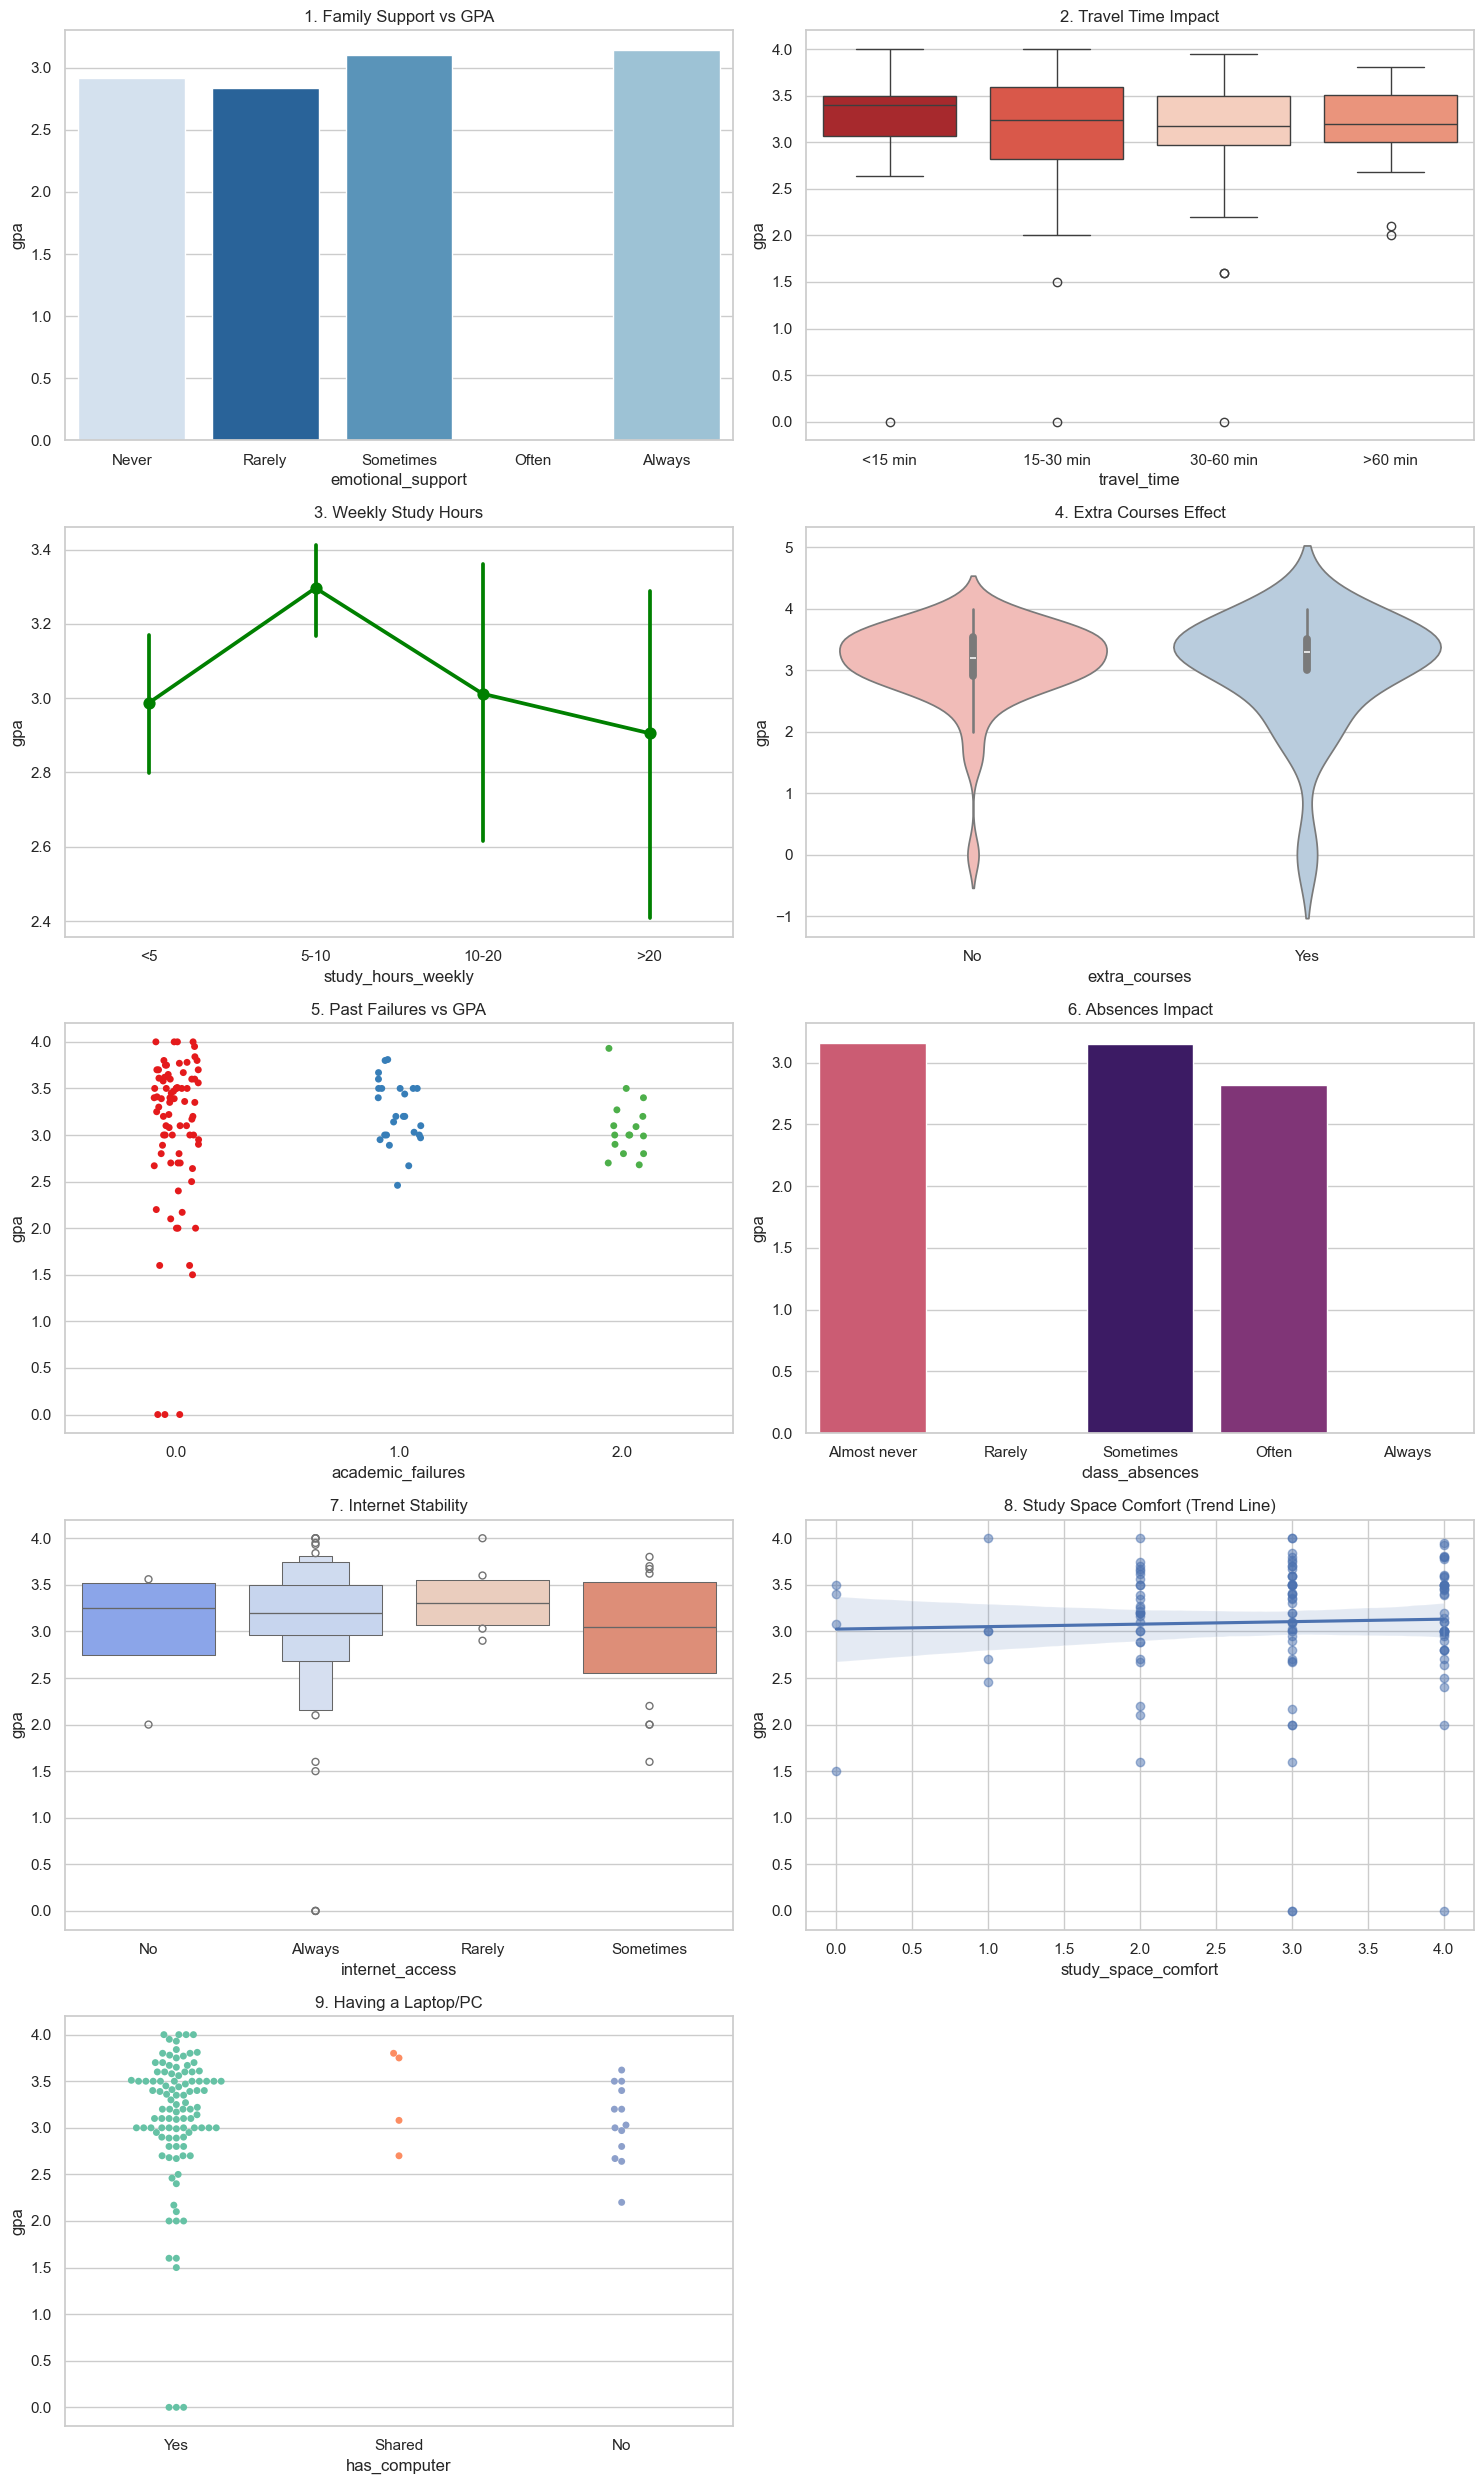

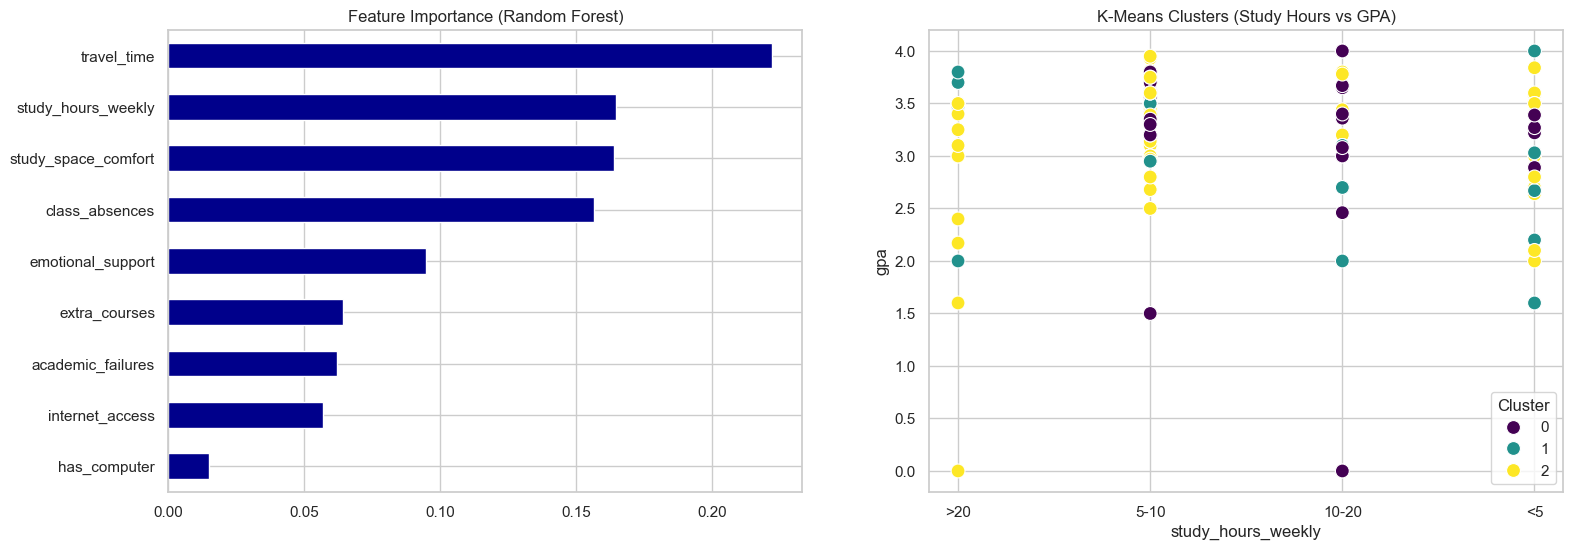


--- ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ (Средние значения) ---
         academic_failures  study_space_comfort       gpa
Cluster                                                  
0                 0.424242             2.878788  3.150909
1                 0.523810             3.714286  3.081905
2                 0.477612             4.507463  3.085672


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings


warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Загрузка данных
df_kz = pd.read_csv('data/data_clean/kz_data_en_clean.csv')


target = 'gpa'
cols_11_19 = [
    'emotional_support', 'travel_time', 'study_hours_weekly',
    'extra_courses', 'academic_failures', 'class_absences',
    'internet_access', 'study_space_comfort', 'has_computer'
]


kz_final = df_kz[cols_11_19 + [target]].copy()

# 2. Подготовка (Label Encoding) для алгоритмов
le = LabelEncoder()
kz_encoded = kz_final.copy()
for col in cols_11_19:
    kz_encoded[col] = le.fit_transform(kz_encoded[col].astype(str))

# --- БЛОК 1: ПОДРОБНЫЙ РАЗБОР ГИПОТЕЗ (БЕЗ WARNINGS) ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 25)
fig, axes = plt.subplots(nrows=5, ncols=2)
axes = axes.flatten()

# Гипотеза 1: Emotional Support
support_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
sns.barplot(x='emotional_support', y='gpa', data=kz_final, ax=axes[0], order=support_order,
            palette='Blues', hue='emotional_support', legend=False, errorbar=None)
axes[0].set_title('1. Family Support vs GPA')

# Гипотеза 2: Travel Time
travel_order = ['<15 min', '15-30 min', '30-60 min', '>60 min']
sns.boxplot(x='travel_time', y='gpa', data=kz_final, ax=axes[1], order=travel_order,
            palette='Reds', hue='travel_time', legend=False)
axes[1].set_title('2. Travel Time Impact')

# Гипотеза 3: Study Hours
study_order = ['<5', '5-10', '10-20', '>20']
sns.pointplot(x='study_hours_weekly', y='gpa', data=kz_final, ax=axes[2], order=study_order, color='green')
axes[2].set_title('3. Weekly Study Hours')

# Гипотеза 4: Extra Courses
sns.violinplot(x='extra_courses', y='gpa', data=kz_final, ax=axes[3],
               palette='Pastel1', hue='extra_courses', legend=False)
axes[3].set_title('4. Extra Courses Effect')

# Гипотеза 5: Academic Failures
sns.stripplot(x='academic_failures', y='gpa', data=kz_final, ax=axes[4],
              palette='Set1', hue='academic_failures', legend=False, jitter=True)
axes[4].set_title('5. Past Failures vs GPA')

# Гипотеза 6: Absences
abs_order = ['Almost never', 'Rarely', 'Sometimes', 'Often', 'Always']
sns.barplot(x='class_absences', y='gpa', data=kz_final, ax=axes[5], order=abs_order,
            palette='magma', hue='class_absences', legend=False, errorbar=None)
axes[5].set_title('6. Absences Impact')

# Гипотеза 7: Internet Access
sns.boxenplot(x='internet_access', y='gpa', data=kz_final, ax=axes[6],
              palette='coolwarm', hue='internet_access', legend=False)
axes[6].set_title('7. Internet Stability')

# Гипотеза 8: Study Space
sns.regplot(x=kz_encoded['study_space_comfort'], y=kz_final['gpa'], ax=axes[7], scatter_kws={'alpha':0.5})
axes[7].set_title('8. Study Space Comfort (Trend Line)')

# Гипотеза 9: Laptop (PC)
sns.swarmplot(x='has_computer', y='gpa', data=kz_final, ax=axes[8],
              palette='Set2', hue='has_computer', legend=False)
axes[8].set_title('9. Having a Laptop/PC')

# Удаляем лишний 10-й график
fig.delaxes(axes[9])
plt.tight_layout()
plt.show()

# --- БЛОК 2: АЛГОРИТМЫ ---

# Кластеризация
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kz_encoded.drop(target, axis=1))
kmeans = KMeans(n_clusters=3, random_state=42)
kz_final['Cluster'] = kmeans.fit_predict(scaled_data)

# Важность признаков
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(kz_encoded.drop(target, axis=1), kz_encoded[target])
importances = pd.Series(rf.feature_importances_, index=cols_11_19).sort_values()

# Визуализация алгоритмов
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

importances.plot(kind='barh', color='darkblue', ax=ax[0])
ax[0].set_title('Feature Importance (Random Forest)')

sns.scatterplot(x='study_hours_weekly', y='gpa', hue='Cluster', data=kz_final, palette='viridis', s=100, ax=ax[1])
ax[1].set_title('K-Means Clusters (Study Hours vs GPA)')

plt.show()

# Итоговая таблица (Средние значения по кластерам)
print("\n--- ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ (Средние значения) ---")
print(kz_final.groupby('Cluster').mean(numeric_only=True))

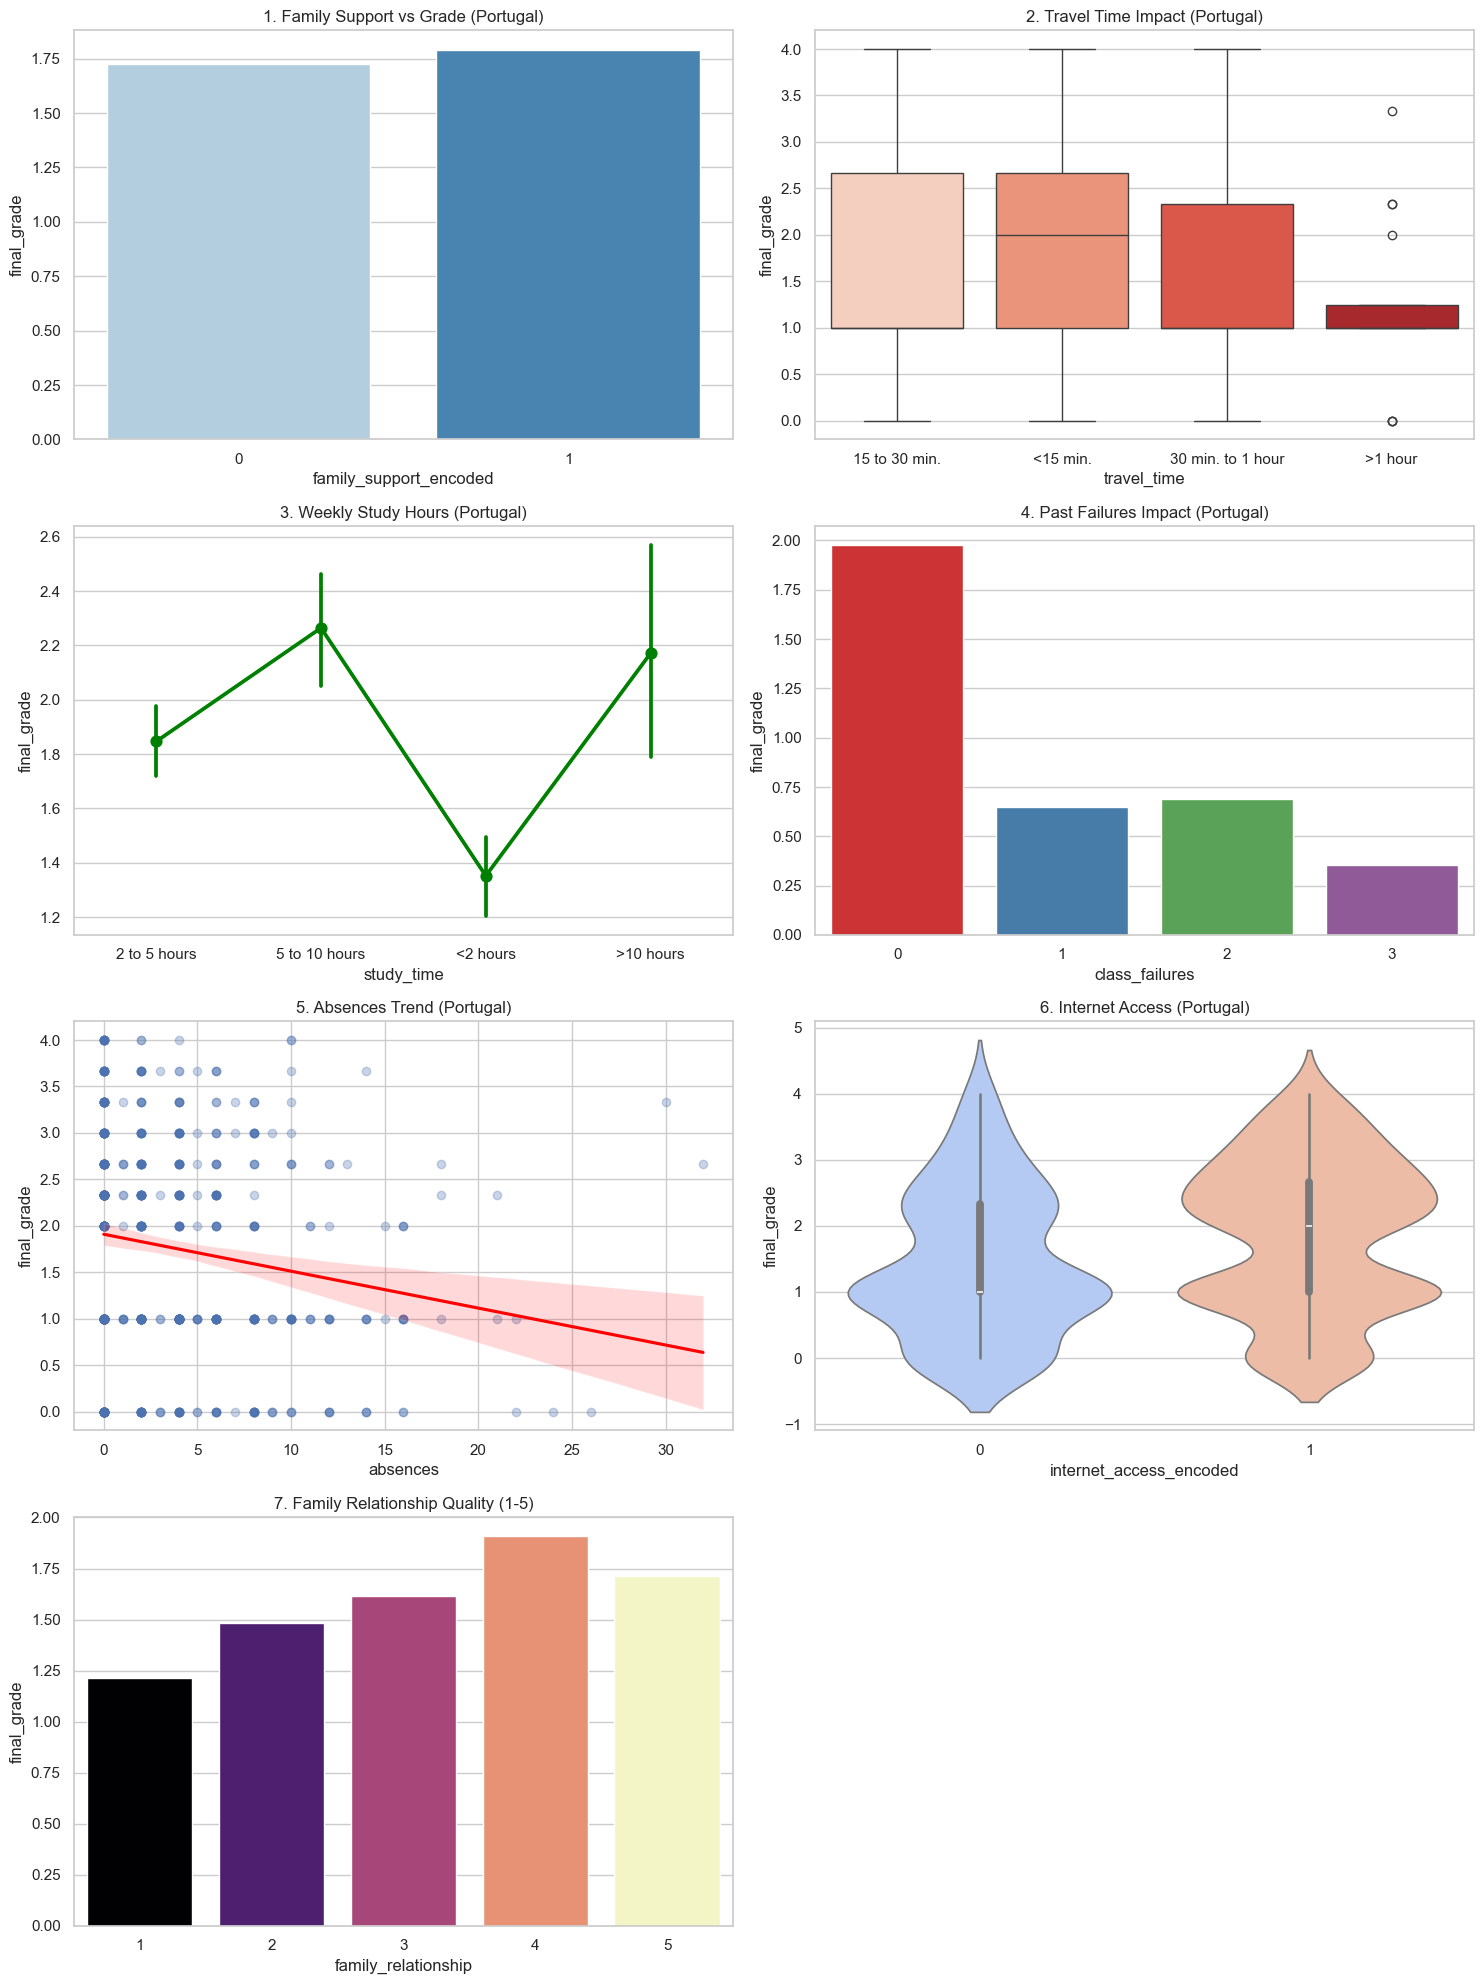

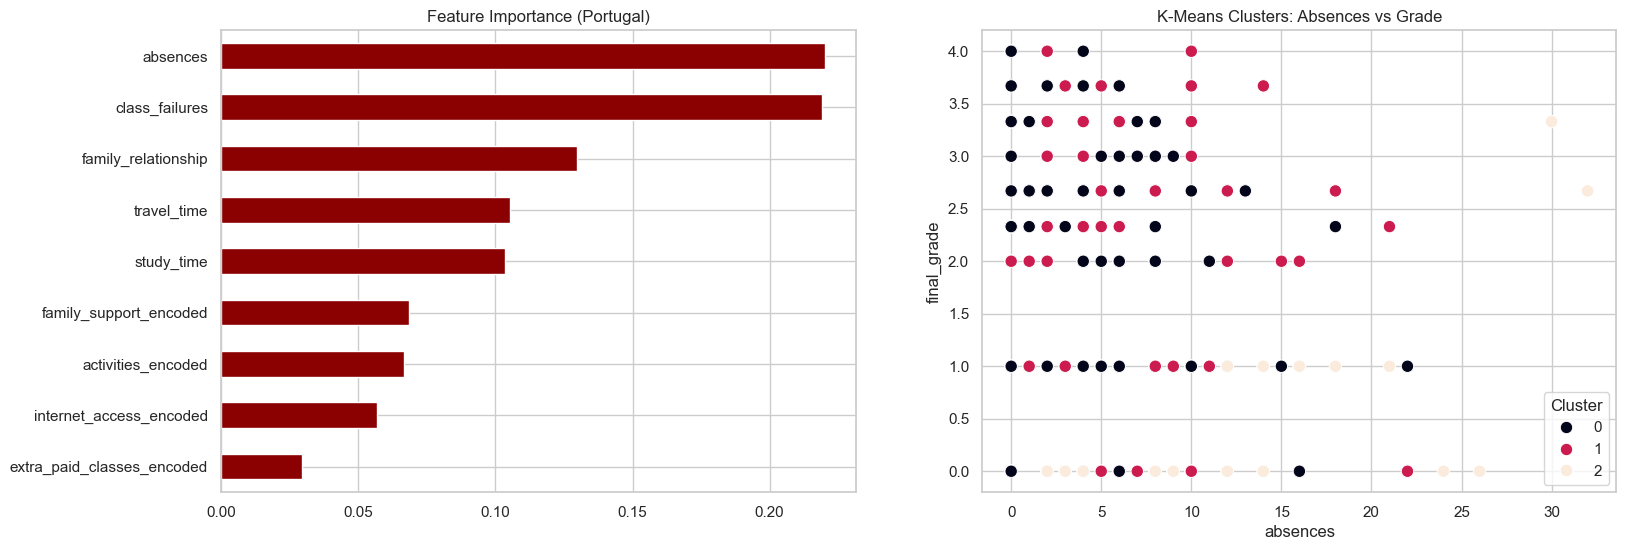


--- ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ПОРТУГАЛИИ (Средние значения) ---
         family_support_encoded  extra_paid_classes_encoded  class_failures  \
Cluster                                                                       
0                      0.000000                    0.025974        0.090909   
1                      1.000000                    0.071839        0.031609   
2                      0.714286                    0.114286        1.600000   

         absences  internet_access_encoded  family_relationship  \
Cluster                                                           
0        3.056277                 0.735931             3.965368   
1        3.247126                 0.801724             3.979885   
2        7.700000                 0.700000             3.571429   

         activities_encoded  final_grade  
Cluster                                   
0                  0.489177     1.818182  
1                  0.485632     1.953793  
2                  0.471429     0

In [6]:
# 1. Загрузка данных
df_pt = pd.read_csv('data/data_clean/student_portuguese_clean.csv')

# Маппинг португальских колонок под наши гипотезы
# final_grade — это их итоговый балл (аналог GPA)
pt_target = 'final_grade'
pt_cols = [
    'family_support_encoded',    # Поддержка (11)
    'travel_time',               # Дорога (12)
    'study_time',                # Часы учебы (13)
    'extra_paid_classes_encoded',# Доп. курсы (14)
    'class_failures',            # Пересдачи (15)
    'absences',                  # Пропуски (16)
    'internet_access_encoded',   # Интернет (17)
    'family_relationship',       # Комфорт/Окружение (18)
    'activities_encoded'         # Наличие ресурсов/активностей (19)
]

pt_final = df_pt[pt_cols + [pt_target]].copy()

# 2. Подготовка (Label Encoding для текстовых полей, если есть)
le = LabelEncoder()
pt_encoded = pt_final.copy()
for col in pt_cols:
    if pt_encoded[col].dtype == 'object':
        pt_encoded[col] = le.fit_transform(pt_encoded[col].astype(str))

# --- БЛОК 1: ГИПОТЕЗЫ ДЛЯ ПОРТУГАЛИИ ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 20)
fig, axes = plt.subplots(nrows=4, ncols=2)
axes = axes.flatten()

# Гипотеза 1: Family Support
sns.barplot(x='family_support_encoded', y=pt_target, data=pt_final, ax=axes[0],
            palette='Blues', hue='family_support_encoded', legend=False, errorbar=None)
axes[0].set_title('1. Family Support vs Grade (Portugal)')

# Гипотеза 2: Travel Time
sns.boxplot(x='travel_time', y=pt_target, data=pt_final, ax=axes[1],
            palette='Reds', hue='travel_time', legend=False)
axes[1].set_title('2. Travel Time Impact (Portugal)')

# Гипотеза 3: Study Time
sns.pointplot(x='study_time', y=pt_target, data=pt_final, ax=axes[2], color='green')
axes[2].set_title('3. Weekly Study Hours (Portugal)')

# Гипотеза 4: Failures (Самый сильный фактор в UCI)
sns.barplot(x='class_failures', y=pt_target, data=pt_final, ax=axes[3],
            palette='Set1', hue='class_failures', legend=False, errorbar=None)
axes[3].set_title('4. Past Failures Impact (Portugal)')

# Гипотеза 5: Absences (Пропуски)
# Используем regplot, так как пропусков может быть много (числа)
sns.regplot(x='absences', y=pt_target, data=pt_final, ax=axes[4], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[4].set_title('5. Absences Trend (Portugal)')

# Гипотеза 6: Internet Access
sns.violinplot(x='internet_access_encoded', y=pt_target, data=pt_final, ax=axes[5],
               palette='coolwarm', hue='internet_access_encoded', legend=False)
axes[5].set_title('6. Internet Access (Portugal)')

# Гипотеза 7: Family Relationship (Аналог комфорта)
sns.barplot(x='family_relationship', y=pt_target, data=pt_final, ax=axes[6],
            palette='magma', hue='family_relationship', legend=False, errorbar=None)
axes[6].set_title('7. Family Relationship Quality (1-5)')

# Удаляем лишний график
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

# --- БЛОК 2: АЛГОРИТМЫ (K-Means & Random Forest) ---

# Кластеризация
scaler = StandardScaler()
scaled_pt = scaler.fit_transform(pt_encoded.drop(pt_target, axis=1))
kmeans_pt = KMeans(n_clusters=3, random_state=42)
pt_final['Cluster'] = kmeans_pt.fit_predict(scaled_pt)

# Важность признаков
rf_pt = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pt.fit(pt_encoded.drop(pt_target, axis=1), pt_encoded[pt_target])
importances_pt = pd.Series(rf_pt.feature_importances_, index=pt_cols).sort_values()

# Визуализация алгоритмов
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

importances_pt.plot(kind='barh', color='darkred', ax=ax[0])
ax[0].set_title('Feature Importance (Portugal)')

sns.scatterplot(x='absences', y=pt_target, hue='Cluster', data=pt_final, palette='rocket', s=80, ax=ax[1])
ax[1].set_title('K-Means Clusters: Absences vs Grade')

plt.show()

# Итоговая таблица
print("\n--- ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ПОРТУГАЛИИ (Средние значения) ---")
print(pt_final.groupby('Cluster').mean(numeric_only=True))

/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_12996/1519674715.py:47: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_pt, x='final_grade', hue='absences', ax=axes[1,1], fill=True, palette='PuBu', legend=False)


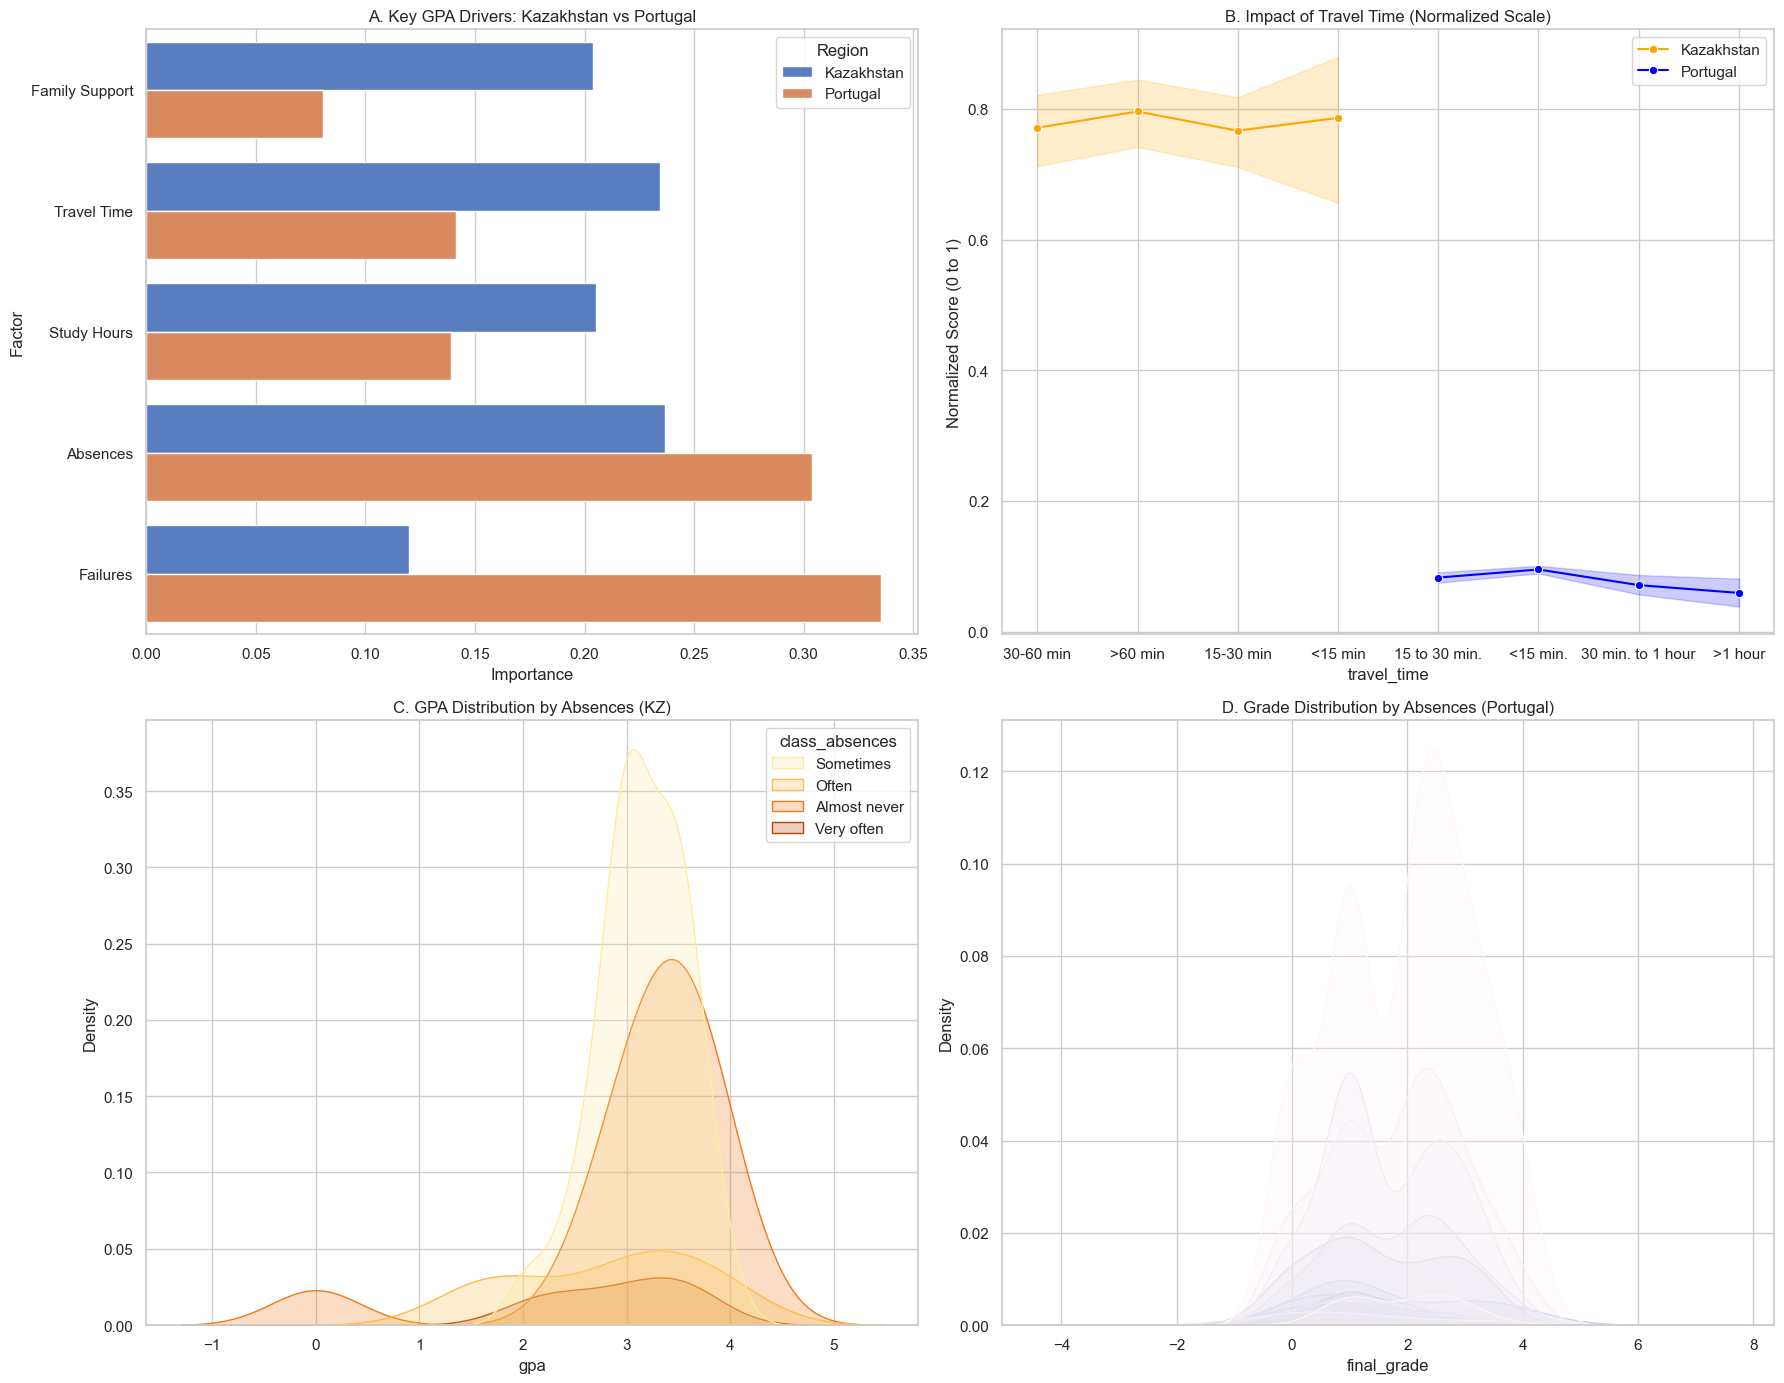

In [7]:
# 2. Расчет важности признаков (Feature Importance) для обеих стран
def get_importance(df, features, target):
    le = LabelEncoder()
    temp_df = df[features + [target]].dropna().copy()
    for col in features:
        if temp_df[col].dtype == 'object':
            temp_df[col] = le.fit_transform(temp_df[col].astype(str))

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(temp_df[features], temp_df[target])
    return pd.Series(rf.feature_importances_, index=features)

# Выбираем сопоставимые признаки
kz_feats = ['emotional_support', 'travel_time', 'study_hours_weekly', 'class_absences', 'academic_failures']
pt_feats = ['family_support_encoded', 'travel_time', 'study_time', 'absences', 'class_failures']

imp_kz = get_importance(df_kz, kz_feats, 'gpa')
imp_pt = get_importance(df_pt, pt_feats, 'final_grade')

# --- ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# А) Сравнение важности факторов (Feature Importance)
comparison_df = pd.DataFrame({
    'Factor': ['Family Support', 'Travel Time', 'Study Hours', 'Absences', 'Failures'],
    'Kazakhstan': imp_kz.values,
    'Portugal': imp_pt.values
}).melt(id_vars='Factor', var_name='Region', value_name='Importance')

sns.barplot(x='Importance', y='Factor', hue='Region', data=comparison_df, ax=axes[0,0], palette='muted')
axes[0,0].set_title('A. Key GPA Drivers: Kazakhstan vs Portugal')

# Б) Сравнение влияния дороги (Travel Time)
# Нормализуем оценки для визуального сравнения (0-1)
df_kz['gpa_norm'] = df_kz['gpa'] / 4.0
df_pt['grade_norm'] = df_pt['final_grade'] / 20.0

sns.lineplot(x='travel_time', y='gpa_norm', data=df_kz, ax=axes[0,1], label='Kazakhstan', marker='o', color='orange')
sns.lineplot(x='travel_time', y='grade_norm', data=df_pt, ax=axes[0,1], label='Portugal', marker='o', color='blue')
axes[0,1].set_title('B. Impact of Travel Time (Normalized Scale)')
axes[0,1].set_ylabel('Normalized Score (0 to 1)')

# В) Сравнение влияния пропусков (Absences)
sns.kdeplot(data=df_kz, x='gpa', hue='class_absences', ax=axes[1,0], fill=True, palette='YlOrBr')
axes[1,0].set_title('C. GPA Distribution by Absences (KZ)')

sns.kdeplot(data=df_pt, x='final_grade', hue='absences', ax=axes[1,1], fill=True, palette='PuBu', legend=False)
axes[1,1].set_title('D. Grade Distribution by Absences (Portugal)')

plt.tight_layout()
plt.show()